# Data Analysis with Python


### Objectives
Clean and explore a real-life dataset from NYC . I will dive deep into the data and find out potential issues to fix and extract insights from it.

**Find the data here:** [2015 Tree Census Data -NYC](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data)

### Data Exploration

In [39]:
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
tree_census = pd.read_csv('2015_Street_Tree_Census_-_Tree_Data.csv')
tree_census.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,8/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,9/3/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,9/5/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,9/5/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1002420.358,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,8/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,990913.775,182202.4260,39.0,165.0,3025654.0,3.010850e+09


In [26]:
tree_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           652173 non-null  object 
 11  guards            652172 non-null  object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          652124 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [27]:
tree_census.isnull().sum()

tree_id                 0
block_id                0
created_at              0
tree_dbh                0
stump_diam              0
curb_loc                0
status                  0
health              31616
spc_latin           31619
spc_common          31619
steward             31615
guards              31616
sidewalk            31616
user_type               0
problems            31664
root_stone              0
root_grate              0
root_other              0
trunk_wire              0
trnk_light              0
trnk_other              0
brch_light              0
brch_shoe               0
brch_other              0
address                 0
postcode                0
zip_city                0
community board         0
borocode                0
borough                 0
cncldist                0
st_assem                0
st_senate               0
nta                     0
nta_name                0
boro_ct                 0
state                   0
latitude                0
longitude   

In [28]:
tree_census[tree_census['health'].isnull()]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
37,211205,302080,9/9/2015,0,16,OnCurb,Stump,NaN,NaN,NaN,...,4009500,New York,40.774993,-73.922037,1.005843e+06,221637.1447,22.0,95.0,4019192.0,4.008740e+09
57,187807,506266,8/29/2015,0,0,OnCurb,Dead,NaN,NaN,NaN,...,2042500,New York,40.871927,-73.882349,1.016788e+06,256965.9677,11.0,415.0,2016979.0,2.032990e+09
196,208322,222858,9/7/2015,10,0,OnCurb,Dead,NaN,NaN,NaN,...,3044500,New York,40.705742,-73.917849,1.007027e+06,196407.8326,37.0,445.0,3073739.0,3.032390e+09
209,209058,415850,9/8/2015,6,0,OnCurb,Dead,NaN,NaN,NaN,...,5012806,New York,40.559061,-74.106038,9.547857e+05,142975.3788,50.0,12806.0,5056700.0,5.040740e+09
239,203597,301947,9/4/2015,0,15,OnCurb,Stump,NaN,NaN,NaN,...,4011700,New York,40.772483,-73.909073,1.009435e+06,220726.1774,22.0,117.0,4015864.0,4.008060e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,8/18/2015,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,...,1015801,New York,40.785136,-73.951109,9.977894e+05,225326.7807,5.0,15801.0,1048443.0,1.015230e+09
683695,170888,231931,8/24/2015,0,5,OnCurb,Stump,NaN,NaN,NaN,...,3079400,New York,40.647154,-73.955619,9.965658e+05,175055.1250,40.0,794.0,3117748.0,3.051270e+09
683697,177922,410634,8/26/2015,0,17,OnCurb,Stump,NaN,NaN,NaN,...,5017600,New York,40.528544,-74.165246,9.383125e+05,131882.7120,51.0,176.0,5081744.0,5.063570e+09
683698,193791,208850,9/1/2015,3,0,OnCurb,Dead,NaN,NaN,NaN,...,3038600,New York,40.590385,-73.972892,9.917788e+05,154370.9206,47.0,386.0,3194400.0,3.071730e+09


In [30]:
 # List of columns to convert
columns_to_convert =['tree_id','block_id','postcode']
# Convert specified columns to string
tree_census[columns_to_convert]=tree_census[columns_to_convert].astype('str')

In [33]:
tree_census[['tree_id','block_id','postcode']].dtypes

tree_id     object
block_id    object
postcode    object
dtype: object

In [37]:
tree_census.describe(include= 'object')

,tree_id,block_id,created_at,curb_loc,status,health,spc_latin,spc_common,steward,guards,...,brch_light,brch_shoe,brch_other,address,postcode,zip_city,borough,nta,nta_name,state
count,683788,683788,683788,683788,683788,652172,652169,652169,652173,652172,...,683788,683788,683788,683788,683788,683788,683788,683788,683788,683788
unique,683788,101390,483,2,3,3,132,132,4,4,...,2,2,2,408701,191,48,5,188,188,1
top,180683,204850,10/27/2015,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,None,None,...,No,No,No,106 CROSS BAY BOULEVARD,10312,Brooklyn,Queens,SI01,Annadale-Huguenot-Prince's Bay-Eltingville,New York
freq,1,450,6852,656896,652173,528850,87014,87014,487823,572306,...,621423,683377,659433,262,22186,177300,250551,12969,12969,683788


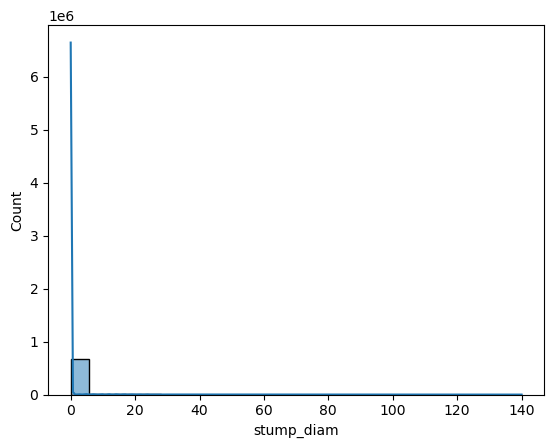

In [41]:
#  Draw the histogram for the  column
sns.histplot(tree_census['stump_diam'], bins=25, kde=True)

# Step 4: Show the plot
plt.show()

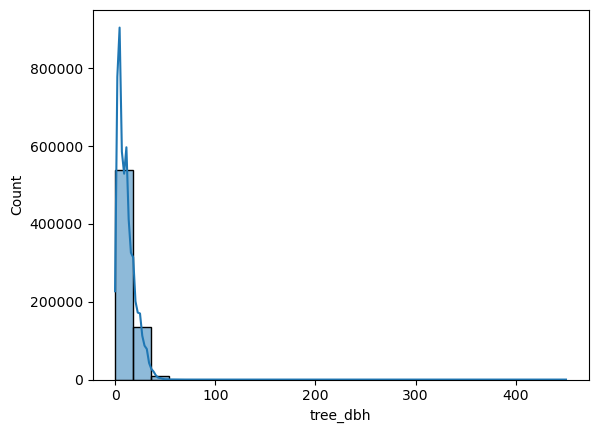

In [42]:
#  Draw the histogram for the  column
sns.histplot(tree_census['tree_dbh'], bins=25, kde=True)

# Step 4: Show the plot
plt.show()

In [44]:
tree_census.loc[tree_census['tree_dbh'] > 50]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
2405,168583,226040,8/23/2015,425,0,OnCurb,Alive,Good,Quercus bicolor,swamp white oak,...,3033900,New York,40.672287,-73.946936,9.989698e+05,184212.9905,35.0,339.0,3031981.0,3.012490e+09
3738,199546,315695,9/3/2015,51,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,...,4099100,New York,40.789872,-73.803291,1.038720e+06,227109.5800,19.0,991.0,4103727.0,4.045590e+09
4887,139665,409474,8/12/2015,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,silver maple,...,5011202,New York,40.572363,-74.091712,9.587713e+05,147816.9196,50.0,11202.0,5054748.0,5.038120e+09
6724,209349,415127,9/8/2015,122,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,5012806,New York,40.562379,-74.115959,9.520303e+05,144187.7691,50.0,12806.0,5109721.0,5.040010e+09
10083,215075,515054,9/11/2015,169,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,2042800,New York,40.894886,-73.847206,1.026493e+06,265345.9703,12.0,428.0,2069059.0,2.050170e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675265,179496,322014,8/27/2015,52,0,OffsetFromCurb,Alive,Good,Quercus palustris,pin oak,...,4113900,New York,40.762782,-73.788133,1.042941e+06,217249.7581,19.0,1139.0,4120138.0,4.053180e+09
677954,166796,348127,8/22/2015,54,0,OnCurb,Alive,Good,Acer saccharinum,silver maple,...,4076902,New York,40.714634,-73.834046,1.030256e+06,199680.4845,29.0,76902.0,4079969.0,4.033440e+09
679894,169501,312374,8/23/2015,51,0,OnCurb,Alive,Good,Quercus alba,white oak,...,4086500,New York,40.763128,-73.825290,1.032648e+06,217353.2642,20.0,865.0,4113294.0,4.050100e+09
681736,179366,349326,8/27/2015,281,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4074300,New York,40.734074,-73.850752,1.025612e+06,206754.6210,29.0,743.0,4051423.0,4.021470e+09


In [45]:
tree_census.loc[tree_census['stump_diam'] > 50]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
6122,200925,208442,9/4/2015,0,52,OnCurb,Stump,NaN,NaN,NaN,...,3060000,New York,40.587284,-73.943331,9.999899e+05,153245.0866,48.0,600.0,3340045.0,3.074700e+09
6177,200924,208442,9/4/2015,0,55,OnCurb,Stump,NaN,NaN,NaN,...,3060000,New York,40.587082,-73.943292,1.000001e+06,153171.2606,48.0,600.0,3205295.0,3.074710e+09
6466,166008,226028,8/22/2015,0,72,OnCurb,Stump,NaN,NaN,NaN,...,3033900,New York,40.672036,-73.942237,1.000273e+06,184122.4156,36.0,341.0,3031662.0,3.012430e+09
7042,206818,311117,9/6/2015,0,100,OnCurb,Stump,NaN,NaN,NaN,...,4080301,New York,40.747117,-73.833058,1.030507e+06,211515.4586,20.0,80301.0,4139073.0,4.063580e+09
9872,192215,203624,8/31/2015,0,53,OnCurb,Stump,NaN,NaN,NaN,...,3005201,New York,40.620341,-74.035363,9.744327e+05,165285.2003,43.0,5201.0,3154637.0,3.060840e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645994,135904,307870,8/11/2015,0,65,OnCurb,Stump,NaN,NaN,NaN,...,4045800,New York,40.717755,-73.787908,1.043043e+06,200845.1715,24.0,458.0,4211494.0,4.098930e+09
646336,151125,330143,8/16/2015,0,55,OnCurb,Stump,NaN,NaN,NaN,...,4047800,New York,40.719588,-73.761745,1.050294e+06,201531.8280,23.0,478.0,4223527.0,4.104950e+09
649174,154188,229334,8/17/2015,0,65,OnCurb,Stump,NaN,NaN,NaN,...,3049800,New York,40.645376,-73.983917,9.887132e+05,174404.7926,39.0,498.0,3123550.0,3.053050e+09
652690,154181,229334,8/17/2015,0,60,OnCurb,Stump,NaN,NaN,NaN,...,3049800,New York,40.645820,-73.982780,9.890288e+05,174566.4905,39.0,498.0,3123563.0,3.053050e+09


<Axes: >

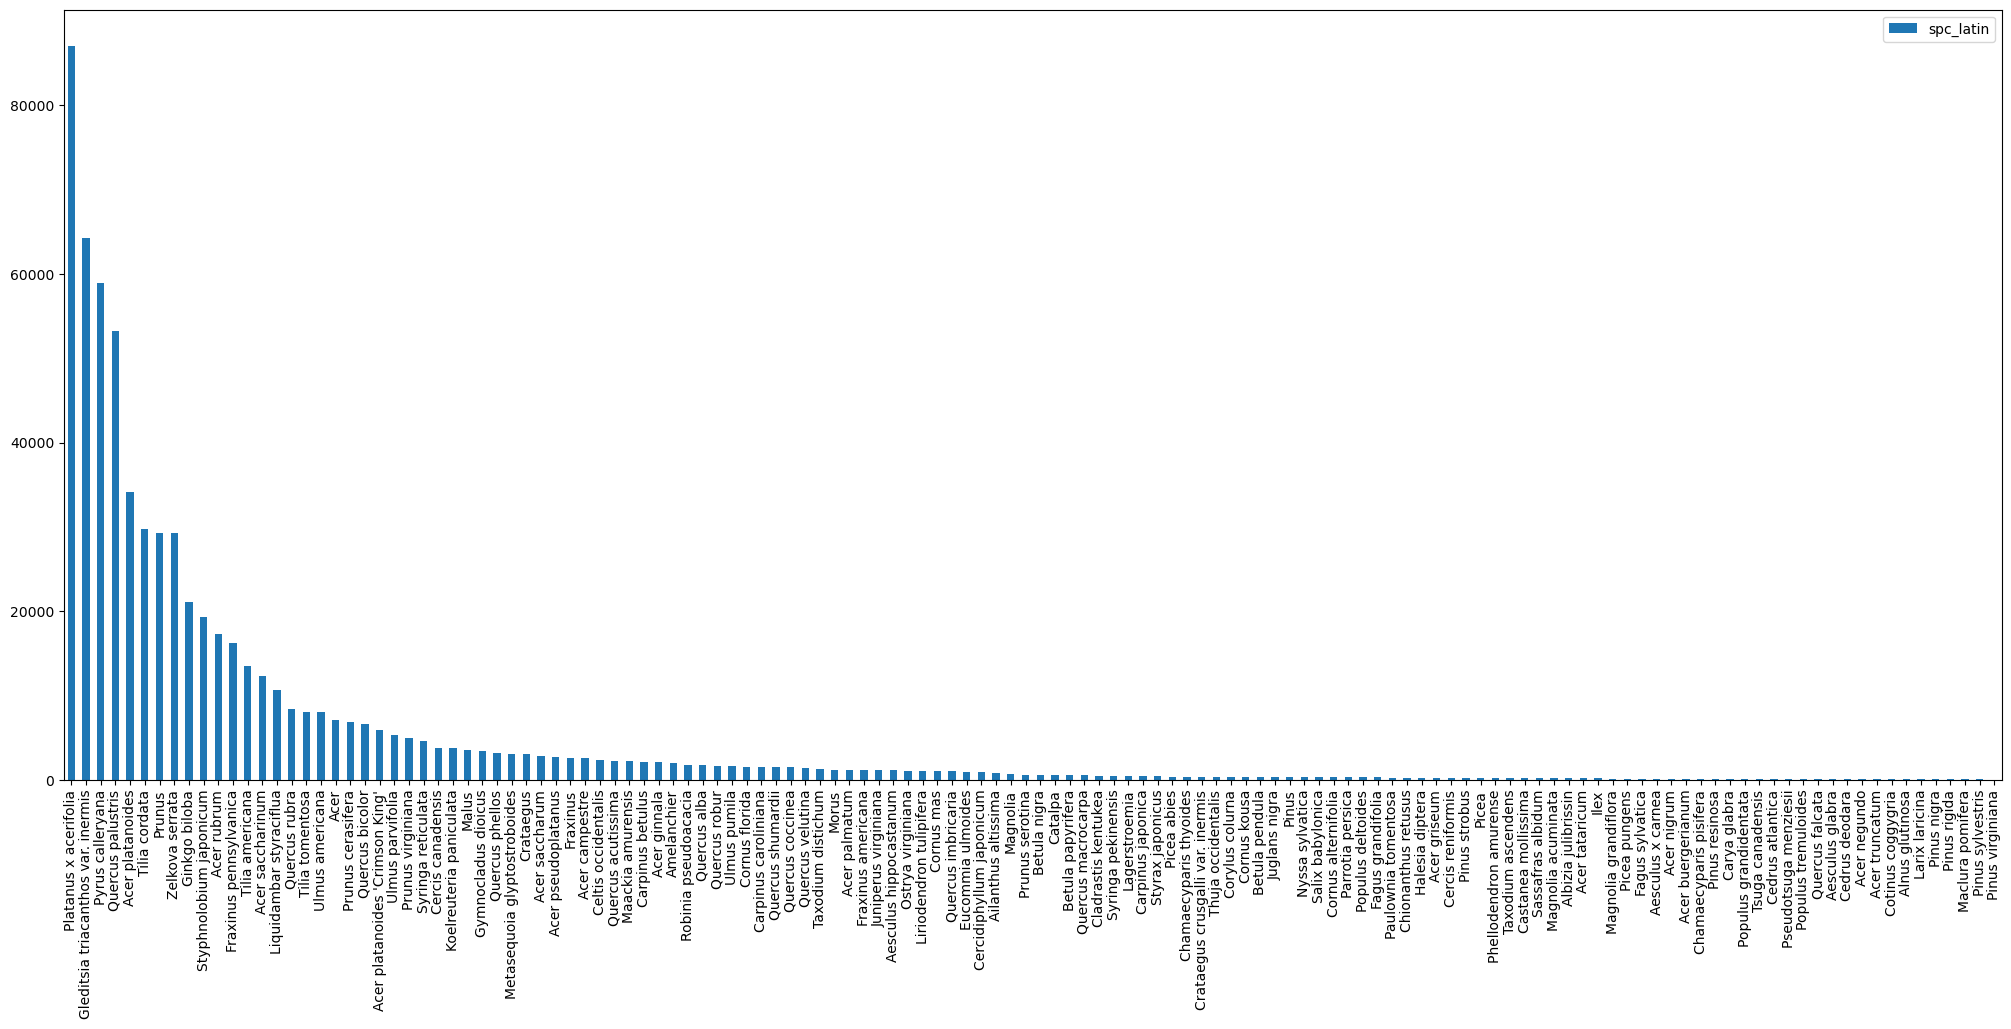

In [48]:
pd.DataFrame(tree_census['spc_latin'].value_counts()).plot(kind='bar',figsize=(25,10))

In [49]:
tree_census['steward'].value_counts()

None       487823
1or2       143557
3or4        19183
4orMore      1610
Name: steward, dtype: int64

In [51]:
tree_census['status'].value_counts()

Alive    652173
Stump     17654
Dead      13961
Name: status, dtype: int64

In [57]:
# If the status of the tree is dead or stump, follwing columns are missing data. The data was not collected
tree_census.loc[(tree_census['status']=='Stump') | (tree_census['status']=='Dead')  ][['health','spc_latin','spc_common','steward','guards','sidewalk']]

,health,spc_latin,spc_common,steward,guards,sidewalk
37,NaN,NaN,NaN,NaN,NaN,NaN
57,NaN,NaN,NaN,NaN,NaN,NaN
196,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
683693,NaN,NaN,NaN,NaN,NaN,NaN
683695,NaN,NaN,NaN,NaN,NaN,NaN
683697,NaN,NaN,NaN,NaN,NaN,NaN
683698,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
tree_problems = tree_census[['root_stone','root_grate','root_other','trunk_wire','trnk_light','trnk_light','trnk_other',
                             'brch_light','brch_shoe','brch_other']]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No,No


In [61]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,1031,32573,62365,411,24355


### Data Cleaning

In [70]:
# If the status of tree is Dead or stump, fill all non null values with not applicable as many data were not collected for these trees
tree_census.loc[(tree_census['status'] == 'Stump') | (tree_census['status'] == 'Dead')]=tree_census.loc[(tree_census['status'] == 'Stump') | (tree_census['status'] == 'Dead')].fillna('Not Applicable')
tree_census.loc[(tree_census['status'] == 'Stump') |(tree_census['status'] == 'Dead') ]

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
37,211205,302080,9/9/2015,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,...,4009500,New York,40.774993,-73.922037,1.005843e+06,221637.1447,22.0,95.0,4019192.0,4008740045.0
57,187807,506266,8/29/2015,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,...,2042500,New York,40.871927,-73.882349,1.016788e+06,256965.9677,11.0,415.0,2016979.0,2032990013.0
196,208322,222858,9/7/2015,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,...,3044500,New York,40.705742,-73.917849,1.007027e+06,196407.8326,37.0,445.0,3073739.0,3032390045.0
209,209058,415850,9/8/2015,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,...,5012806,New York,40.559061,-74.106038,9.547857e+05,142975.3788,50.0,12806.0,5056700.0,5040740033.0
239,203597,301947,9/4/2015,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,...,4011700,New York,40.772483,-73.909073,1.009435e+06,220726.1774,22.0,117.0,4015864.0,4008060007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,108193,8/18/2015,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,...,1015801,New York,40.785136,-73.951109,9.977894e+05,225326.7807,5.0,15801.0,1048443.0,1015230050.0
683695,170888,231931,8/24/2015,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,...,3079400,New York,40.647154,-73.955619,9.965658e+05,175055.1250,40.0,794.0,3117748.0,3051270073.0
683697,177922,410634,8/26/2015,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,...,5017600,New York,40.528544,-74.165246,9.383125e+05,131882.7120,51.0,176.0,5081744.0,5063570007.0
683698,193791,208850,9/1/2015,3,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,...,3038600,New York,40.590385,-73.972892,9.917788e+05,154370.9206,47.0,386.0,3194400.0,3071730042.0


In [71]:
# Further investigate null
tree_census.isna().sum()

tree_id                0
block_id               0
created_at             0
tree_dbh               0
stump_diam             0
curb_loc               0
status                 0
health                 1
spc_latin              5
spc_common             5
steward                0
guards                 1
sidewalk               1
user_type              0
problems              49
root_stone             0
root_grate             0
root_other             0
trunk_wire             0
trnk_light             0
trnk_other             0
brch_light             0
brch_shoe              0
brch_other             0
address                0
postcode               0
zip_city               0
community board        0
borocode               0
borough                0
cncldist               0
st_assem               0
st_senate              0
nta                    0
nta_name               0
boro_ct                0
state                  0
latitude               0
longitude              0
x_sp                   0


In [72]:
# drop columns as mojority of the rows are nulls
tree_census.drop(['council district','census tract','bin','bbl'], axis = 1, inplace =True)

In [76]:
tree_census['health'].value_counts()

Good              528850
Fair               96504
Not Applicable     31615
Poor               26818
Name: health, dtype: int64

In [87]:
# Fill health column with mode 
tree_census['health'].fillna('Good',inplace=True)
# Fill Problem column with None as None indicate absence of value
tree_census['problems'].fillna('None',inplace=True)
# Fill Spc latin column
tree_census['spc_latin'].fillna('No Observation',inplace=True)
# Fill Side Walk as No Damage is already exsisiting value
tree_census['sidewalk'].fillna('No Damage',inplace=True)
#tree_census

In [92]:
# Replace null  with mode
tree_census['spc_common'].fillna('London planetree ',inplace=True)

In [93]:
#replace null with mode
tree_census['guards'].fillna('None ',inplace=True)

In [96]:
tree_census['tree_dbh'].value_counts()

4      60372
3      54454
2      41977
5      41642
11     37978
       ...  
142        1
98         1
147        1
154        1
281        1
Name: tree_dbh, Length: 146, dtype: int64

In [99]:
# remove outliers to calulate the descriptive statistics accurately
tree_census_data=tree_census.loc[(tree_census['tree_dbh'] <= 60) & (tree_census['stump_diam'] <= 60)]

In [100]:
tree_census_data

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,st_assem,st_senate,nta,nta_name,boro_ct,state,latitude,longitude,x_sp,y_sp
0,180683,348711,8/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,28,16,QN17,Forest Hills,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687
1,200540,315986,9/3/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,27,11,QN49,Whitestone,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374
2,204026,218365,9/5/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,50,18,BK90,East Williamsburg,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913
3,204337,217969,9/5/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,53,18,BK90,East Williamsburg,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531
4,189565,223043,8/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,44,21,BK37,Park Slope-Gowanus,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,8/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,53,18,BK73,North Side-South Side,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363
683784,183795,348185,8/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,28,15,QN17,Forest Hills,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475
683785,166161,401670,8/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,63,24,SI07,Westerleigh,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763
683786,184028,504204,8/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,86,33,BX41,Mount Hope,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507


In [107]:
tree_census_Alive=tree_census_data.loc[tree_census_data['status']=='Alive']
tree_census_dead_stump = tree_census_data.loc[(tree_census_data['status']=='Stump') | (tree_census_data['status']=='Dead')]